<h1><center> Laboratorio 1</center></h1>


In [1]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../Laboratorio 1/responses.csv')

In [3]:
from IPython.display import display

#### Estadisticos de la variable Edad

In [4]:
print("Moda:",data.Age.mode())
print("Media:", data.Age.mean())
print("Mediana:",data.Age.median())
print("Desviación standard:", data.Age.std())

Moda: 0    19.0
dtype: float64
Media: 20.43369890329013
Mediana: 20.0
Desviación standard: 2.828840098778979


#### Estadisticos de la variable Peso

In [5]:
print("Moda:",data.Weight.mode())
print("Media:", data.Weight.mean())
print("Mediana:",data.Weight.median())
print("Desviación standard:", data.Weight.std())


Moda: 0    60.0
dtype: float64
Media: 66.40505050505051
Mediana: 64.0
Desviación standard: 13.83956078119004


In [6]:
data.Weight.dropna().describe()

count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64

### Distribución de edades

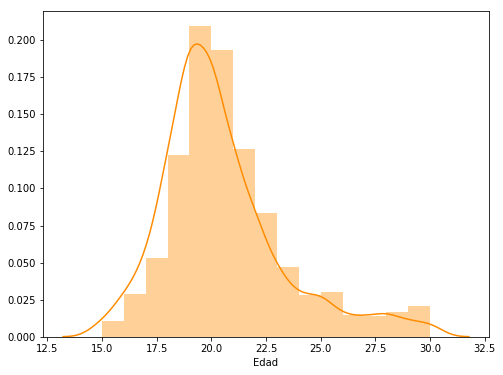

In [7]:
#plt.hist(data["Age"].dropna(),bins=list(range(10,35)))
plt.figure(figsize=(8,6))
sns.distplot(data.Age.dropna(),bins=list(range(15,31)),color="darkorange",axlabel= "Edad")


### Distribución de Pesos

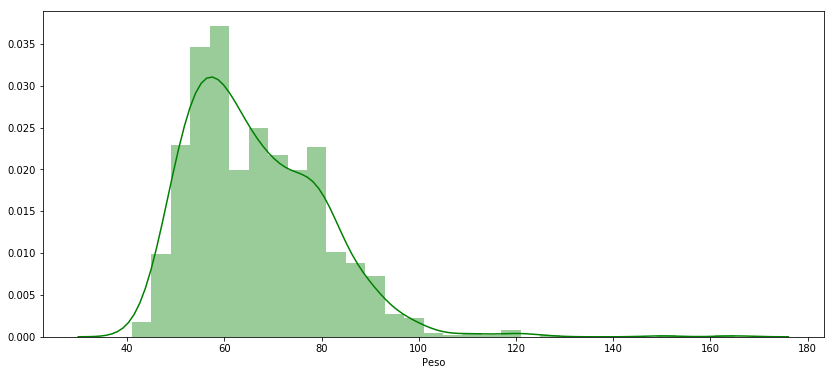

In [9]:
#plt.hist(data["Weight"].dropna(),bins=list(range(40,200,6)))
plt.figure(figsize=(14,6))
sns.distplot(data.Weight.dropna(),color="green",axlabel= "Peso")

Podemos ver que los estadisticos moda, media, mediana y desviación estándar del peso y de la edad se aproximan a los estatisticos de una distribución normal.

### Outliers

In [10]:
display(data[data['Weight']>120][['Age', 'Weight', 'Gender']])

,Age,Weight,Gender
859,20.0,125.0,male
885,23.0,165.0,female
992,30.0,150.0,male


Vamos a descartar estos datos

In [11]:
data.drop([885,992, 859], inplace = True)

Ahora podemos visualizar mejor la distribución de pesos

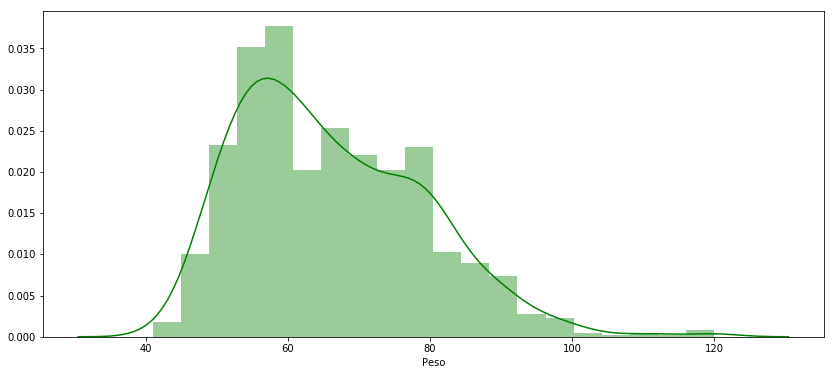

In [12]:
plt.figure(figsize=(14,6))
sns.distplot(data.Weight.dropna(),color="green",axlabel= "Peso")

### Análisis por género

Volvemos a calcular los estadisticos, esta vez separados por géneros.

#### Hombres

In [13]:
print("Moda:",data[data["Gender"]=="male"].Age.mode())
print("Media:", data[data["Gender"]=="male"].Age.mean())
print("Mediana:",data[data["Gender"]=="male"].Age.median())
print("Desviación standard:", data[data["Gender"]=="male"].Age.std())

Moda: 0    19.0
dtype: float64
Media: 20.852579852579854
Mediana: 20.0
Desviación standard: 2.7664219885273957


In [14]:
print("Moda:",data[data["Gender"]=="male"].Weight.mode())
print("Media:", data[data["Gender"]=="male"].Weight.mean())
print("Mediana:",data[data["Gender"]=="male"].Weight.median())
print("Desviación standard:", data[data["Gender"]=="male"].Weight.std())

Moda: 0    80.0
dtype: float64
Media: 76.78908188585608
Mediana: 77.0
Desviación standard: 10.508829734504237


#### Mujeres

In [15]:
print("Moda:",data[data["Gender"]=="female"].Age.mode())
print("Media:", data[data["Gender"]=="female"].Age.mean())
print("Mediana:",data[data["Gender"]=="female"].Age.median())
print("Desviación standard:", data[data["Gender"]=="female"].Age.std())

Moda: 0    19.0
dtype: float64
Media: 20.108843537414966
Mediana: 20.0
Desviación standard: 2.792370358815767


In [16]:
print("Moda:",data[data["Gender"]=="female"].Weight.mode())
print("Media:", data[data["Gender"]=="female"].Weight.mean())
print("Mediana:",data[data["Gender"]=="female"].Weight.median())
print("Desviación standard:", data[data["Gender"]=="female"].Weight.std())

Moda: 0    60.0
dtype: float64
Media: 58.780656303972364
Mediana: 57.0
Desviación standard: 8.988953558324239


### Distribución de edades por género

Ahora podemos ver los gráficos de las distribuciones de edades y pesos, divididas por género

[(0, 0.25), Text(0.5,0,'Edad'), Text(0.5,1,'Mujeres')]

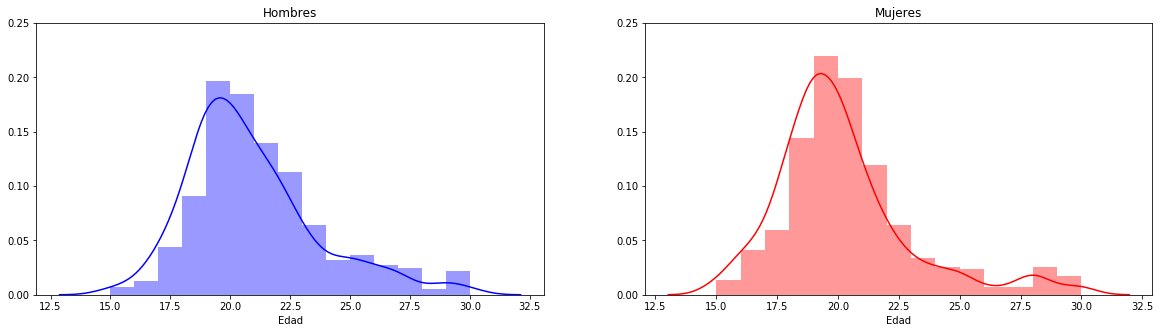

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.distplot(data[data["Gender"]=="male"].Age.dropna(),bins=list(range(15,31)), ax = ax[0],color="blue")
sns.distplot(data[data["Gender"]=="female"].Age.dropna(),bins=list(range(15,31)), ax = ax[1],color="red")
ax[0].set(ylim=(0, 0.25),xlabel='Edad',title="Hombres")
ax[1].set(ylim=(0, 0.25),xlabel='Edad',title="Mujeres")


Text(0.5,1,'Hombres y mujeres')

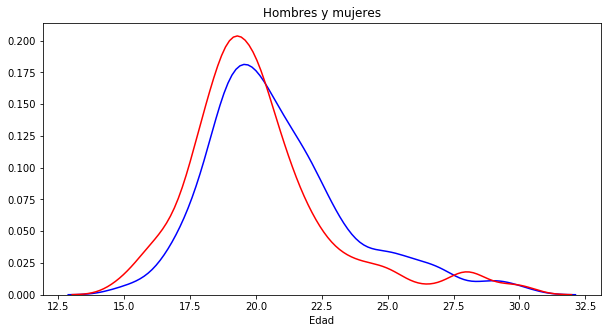

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(data[data["Gender"]=="male"].Age.dropna(),bins=list(range(15,31)),color="blue",hist=False)
sns.distplot(data[data["Gender"]=="female"].Age.dropna(),bins=list(range(15,31)),color="red",hist=False)
plt.xlabel('Edad')
plt.title("Hombres y mujeres")

### Distribución de pesos por género

[(0, 0.12), (40, 120), Text(0.5,0,'Peso mujeres'), Text(0.5,1,'Mujeres')]

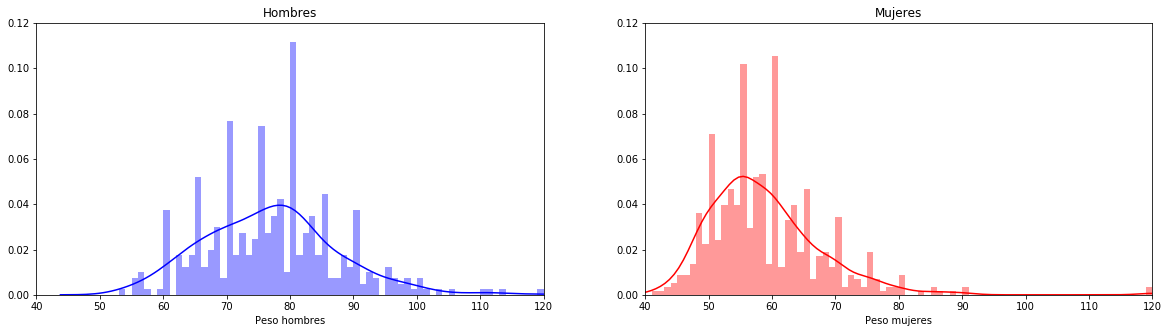

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.distplot(data[data["Gender"]=="male"].Weight.dropna(),bins=list(range(40,121)), ax = ax[0],color="blue")
sns.distplot(data[data["Gender"]=="female"].Weight.dropna(),bins=list(range(40,121)), ax = ax[1],color="red")
ax[0].set(xlim=(40, 120),ylim=(0, 0.12),xlabel="Peso hombres",title="Hombres")
ax[1].set(xlim=(40, 120),ylim=(0, 0.12),xlabel="Peso mujeres",title="Mujeres")

Text(0.5,1,'Hombres y mujeres')

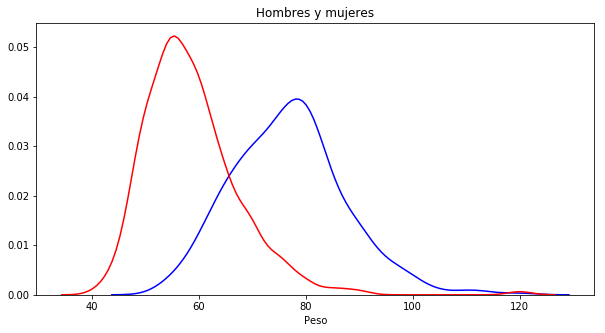

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(data[data["Gender"]=="male"].Weight.dropna(),bins=list(range(15,31)),color="blue",hist=False)
sns.distplot(data[data["Gender"]=="female"].Weight.dropna(),bins=list(range(15,31)),color="red",hist=False)
plt.xlabel('Peso')
plt.title("Hombres y mujeres")

Podemos ver que los estadisticos moda, media, mediana y desviación estándar del peso y de la edad, separados por género, también se aproximan a los estatisticos de una distribución normal.

### Correlación entre el peso y la edad

In [36]:
corr = data[["Age","Weight"]].corr()
corr

,Age,Weight
Age,1.000000,0.224844
Weight,0.224844,1.000000


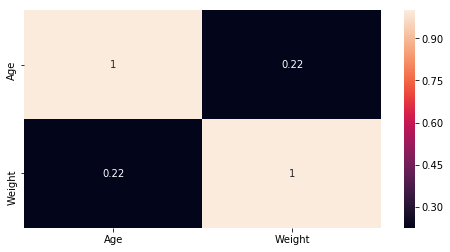

In [37]:
plt.figure(figsize=(8,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

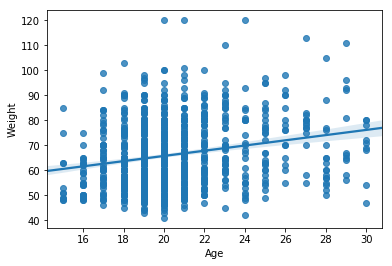

In [38]:
sns.regplot(x="Age", y="Weight", data=data)

### Tabaquismo y alcoholismo
![](url='https://ezequiascaleb.files.wordpress.com/2013/05/tabaco-alcohol.jpg')

In [39]:
data.Smoking.describe()

count               999
unique                4
top       tried smoking
freq                429
Name: Smoking, dtype: object

In [40]:
data.Smoking.unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [41]:
data.Alcohol.describe()

count               1002
unique                 3
top       social drinker
freq                 658
Name: Alcohol, dtype: object

In [42]:
data.Alcohol.unique()

array(['drink a lot', 'social drinker', 'never', nan], dtype=object)

### Probabilidades marginal y conjunta de las variables Alcohol y Smoking.

En la siguiente tabla podemos ver las probabilidades conjuntas y al final de cada fila y columna  la probabilidad marginal.

In [43]:
AlSmoke= pd.crosstab(index=data["Alcohol"],  # Tabla de doble entrada
                      columns=data["Smoking"],normalize="all",margins=True)      
AlSmoke

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,0.078235,0.055165,0.015045,0.071214,0.219659
never,0.011033,0.011033,0.060181,0.039117,0.121364
social drinker,0.098295,0.109328,0.131394,0.319960,0.658977
All,0.187563,0.175527,0.206620,0.430291,1.000000


#### Probabilidad marginal de la variable Alcohol

In [44]:
AlSmoke.All

Alcohol
drink a lot       0.219659
never             0.121364
social drinker    0.658977
All               1.000000
Name: All, dtype: float64

#### Probabilidad marginal de la variable Smoking

In [71]:
AlSmoke.loc[["All"]]

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
All,0.187563,0.175527,0.20662,0.430291,1.0


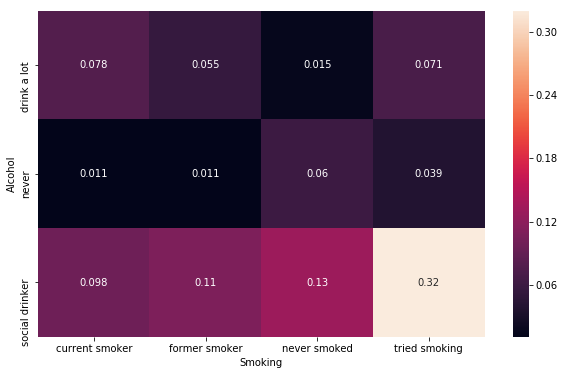

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(AlSmoke.iloc[:-1, :-1], annot=True)

### Correlación entre toma de alcohol y tabaquismo

In [60]:
csa = pd.get_dummies(data["Smoking"]).join(pd.get_dummies(data["Alcohol"]))
csacorr = csa.corr()
csacorr

,current smoker,former smoker,never smoked,tried smoking,drink a lot,never,social drinker
current smoker,1.000000,-0.219733,-0.243712,-0.412764,0.226230,-0.093106,-0.133047
former smoker,-0.219733,1.000000,-0.233291,-0.395114,0.105072,-0.083037,-0.029461
never smoked,-0.243712,-0.233291,1.000000,-0.438233,-0.180667,0.260525,-0.021994
tried smoking,-0.412764,-0.395114,-0.438233,1.000000,-0.112326,-0.082181,0.163230
drink a lot,0.226230,0.105072,-0.180667,-0.112326,1.000000,-0.197793,-0.728090
never,-0.093106,-0.083037,0.260525,-0.082181,-0.197793,1.000000,-0.512185
social drinker,-0.133047,-0.029461,-0.021994,0.163230,-0.728090,-0.512185,1.000000


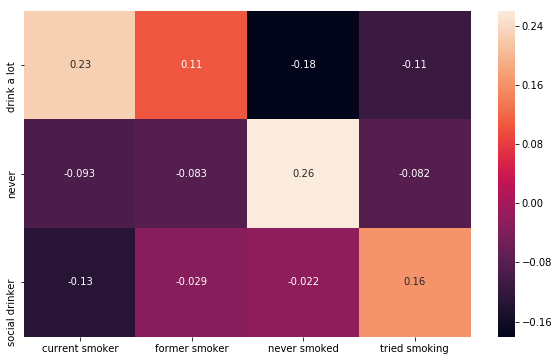

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(csacorr.iloc[4:, :-3], annot=True)

###  ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares?

In [74]:
(AlSmoke.loc["drink a lot","current smoker"]+ AlSmoke.loc["social drinker","current smoker"])*100/AlSmoke.loc["All","current smoker"]

94.11764705882352

El porcentaje de personas que toma alcohol,dado que fuma es del 94% aprox, entonces si se prohibe fumar, es probable que baje el nivel de tabaquismo.

 ### ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?
 

In [66]:
display("Consumidores de alcohol:", AlSmoke.All["drink a lot"]+AlSmoke.All["social drinker"])

'Consumidores de alcohol:'

0.8786359077231696

In [ ]:
La cantidad de consumidores de alcohol 